In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## finding_annotations 
finding_annotations = pd.read_csv(r"C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\finding_annotations.csv")

## metadata
metadata = pd.read_csv(r"C:\Users\jssuz\OneDrive\Desktop\grad_school_files\capstone\Dataset_B_Subset\metadata.csv")

In [4]:
## finding_annotations: starter information
finding_annotations.info()
finding_annotations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20486 entries, 0 to 20485
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   study_id            20486 non-null  object 
 1   series_id           20486 non-null  object 
 2   image_id            20486 non-null  object 
 3   laterality          20486 non-null  object 
 4   view_position       20486 non-null  object 
 5   height              20486 non-null  int64  
 6   width               20486 non-null  int64  
 7   breast_birads       20486 non-null  object 
 8   breast_density      20486 non-null  object 
 9   finding_categories  20486 non-null  object 
 10  finding_birads      2129 non-null   object 
 11  xmin                2254 non-null   float64
 12  ymin                2254 non-null   float64
 13  xmax                2254 non-null   float64
 14  ymax                2254 non-null   float64
 15  split               20486 non-null  object 
dtypes: f

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,training
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,training
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Architectural Distortion'],BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,training


In [5]:
## Count unique values in each column (UVC = unique value counts)
study_id_UVC = finding_annotations['study_id'].value_counts()
min_study_id_UVC = min(study_id_UVC)
max_study_id_UVC = max(study_id_UVC)
med_study_id_UVC = study_id_UVC.median()

print(f"The minimum value in study_id_UVC is {min_study_id_UVC}.")
print(f"The maximum value in study_id_UVC is {max_study_id_UVC}.")
print(f"The median of study_id_UVC is {med_study_id_UVC}.")

The minimum value in study_id_UVC is 4.
The maximum value in study_id_UVC is 14.
The median of study_id_UVC is 4.0.


The reason why there are non-4 values in the study_ID is because there can be multiple findings per image. This is shown in the block below.

Additionally, we can see that there are multiple BIRAD scores for these breasts.

In [6]:
finding_annotations[finding_annotations['study_id'] == "6d4cd11574ad3598cca9b228bcfcc024"]

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
797,6d4cd11574ad3598cca9b228bcfcc024,9713711cfb9dcb0d2be37917c083a1aa,f1b0fbd4eebff392ed4b9886034c29ca,L,CC,3518,2800,BI-RADS 5,DENSITY C,['Suspicious Calcification'],BI-RADS 4,125.739998,1605.229980,165.009995,1645.560059,training
798,6d4cd11574ad3598cca9b228bcfcc024,9713711cfb9dcb0d2be37917c083a1aa,f1b0fbd4eebff392ed4b9886034c29ca,L,CC,3518,2800,BI-RADS 5,DENSITY C,['Suspicious Calcification'],BI-RADS 4,128.923996,1334.579956,202.156998,1449.209961,training
799,6d4cd11574ad3598cca9b228bcfcc024,9713711cfb9dcb0d2be37917c083a1aa,f1b0fbd4eebff392ed4b9886034c29ca,L,CC,3518,2800,BI-RADS 5,DENSITY C,['Suspicious Calcification'],BI-RADS 4,281.757996,1219.959961,466.433990,1426.920044,training
800,6d4cd11574ad3598cca9b228bcfcc024,9713711cfb9dcb0d2be37917c083a1aa,f1b0fbd4eebff392ed4b9886034c29ca,L,CC,3518,2800,BI-RADS 5,DENSITY C,['Suspicious Calcification'],BI-RADS 4,474.691986,1428.650024,574.148010,1502.079956,training
801,6d4cd11574ad3598cca9b228bcfcc024,9713711cfb9dcb0d2be37917c083a1aa,f1b0fbd4eebff392ed4b9886034c29ca,L,CC,3518,2800,BI-RADS 5,DENSITY C,['Focal Asymmetry'],BI-RADS 4,269.829987,1151.439941,628.244995,1513.579956,training
802,6d4cd11574ad3598cca9b228bcfcc024,9713711cfb9dcb0d2be37917c083a1aa,8aaea8ad26744fa23f786699ae38d66e,L,MLO,3518,2800,BI-RADS 5,DENSITY C,['Mass'],BI-RADS 4,89.272202,1067.569946,252.289993,1230.589966,training
803,6d4cd11574ad3598cca9b228bcfcc024,9713711cfb9dcb0d2be37917c083a1aa,8aaea8ad26744fa23f786699ae38d66e,L,MLO,3518,2800,BI-RADS 5,DENSITY C,['Suspicious Calcification'],BI-RADS 4,141.667999,904.942017,229.429993,1053.459961,training
804,6d4cd11574ad3598cca9b228bcfcc024,9713711cfb9dcb0d2be37917c083a1aa,8aaea8ad26744fa23f786699ae38d66e,L,MLO,3518,2800,BI-RADS 5,DENSITY C,"['Suspicious Calcification', 'Architectural Di...",BI-RADS 5,517.044983,1190.270020,755.179016,1448.780029,training
805,6d4cd11574ad3598cca9b228bcfcc024,9713711cfb9dcb0d2be37917c083a1aa,8aaea8ad26744fa23f786699ae38d66e,L,MLO,3518,2800,BI-RADS 5,DENSITY C,['Suspicious Calcification'],BI-RADS 4,277.717010,1438.199951,312.130005,1480.869995,training
806,6d4cd11574ad3598cca9b228bcfcc024,9713711cfb9dcb0d2be37917c083a1aa,8aaea8ad26744fa23f786699ae38d66e,L,MLO,3518,2800,BI-RADS 5,DENSITY C,['Suspicious Calcification'],BI-RADS 4,394.720001,1249.619995,515.853027,1345.969971,training


In [7]:
## This code below shows that there are indeed only 4 images associated with each study_id

study_df = finding_annotations.groupby('study_id').agg({'image_id': 'nunique'}).sort_values('image_id', ascending = True)
z = study_df.groupby('image_id').size()
z.columns = ['cnt of images per study']
z

image_id
4    5000
dtype: int64

In [8]:
## Count unique values in each column (UVC = unique value counts)
series_id_UVC = finding_annotations['series_id'].value_counts()
min_series_id_UVC = min(series_id_UVC)
max_series_id_UVC = max(series_id_UVC)
med_series_id_UVC = series_id_UVC.median()

print(f"The minimum value in series_id_UVC is {min_series_id_UVC}.")
print(f"The maximum value in series_id_UVC is {max_series_id_UVC}.")
print(f"The median of series_id_UVC is {med_series_id_UVC}.")

The minimum value in series_id_UVC is 1.
The maximum value in series_id_UVC is 14.
The median of series_id_UVC is 4.0.


There are series IDs that are not one-to-one with study IDs. For example, for this specific study_id, series_ids are unique. This implies that series IDs are associated with individuals. 

In [9]:
finding_annotations[finding_annotations['series_id'] == 'c978f22bc6fbb2e6e64bbe179a8ede50']

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
2067,6f9a7e206e52623c945f1039cd069cee,c978f22bc6fbb2e6e64bbe179a8ede50,551162489fd5e6b59336fc1eee7b7021,L,MLO,3580,2812,BI-RADS 4,DENSITY B,['Mass'],BI-RADS 4,333.114014,1359.550049,722.46698,1800.810059,training


In [10]:
finding_annotations[finding_annotations['study_id'] == '6f9a7e206e52623c945f1039cd069cee']

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
2067,6f9a7e206e52623c945f1039cd069cee,c978f22bc6fbb2e6e64bbe179a8ede50,551162489fd5e6b59336fc1eee7b7021,L,MLO,3580,2812,BI-RADS 4,DENSITY B,['Mass'],BI-RADS 4,333.114014,1359.550049,722.466980,1800.810059,training
2068,6f9a7e206e52623c945f1039cd069cee,06df3fe6248a157db49f41f7e94e6793,4e18bc58696aa628e02c43be53b73cda,L,CC,3580,2812,BI-RADS 4,DENSITY B,['Mass'],BI-RADS 4,177.104004,1106.550049,621.396973,1630.239990,training
2069,6f9a7e206e52623c945f1039cd069cee,1626245db8b6c6ab25362303a163c5e4,fad1035fa251f5f7fc318dea403aa7dc,R,MLO,3580,2812,BI-RADS 3,DENSITY B,['Mass'],BI-RADS 3,2738.929932,1708.849976,2830.149902,1833.479980,training
2070,6f9a7e206e52623c945f1039cd069cee,d788dc8592c166feea6ea2bfe49b3abf,f448ee036cf84e001c689b24b05cf96c,R,CC,3580,2812,BI-RADS 3,DENSITY B,['Mass'],BI-RADS 3,2608.850098,1322.729980,2732.689941,1457.180054,training


In [11]:
## Same as breast-level annotaitons.
finding_annotations.nunique()

study_id               5000
series_id              5036
image_id              20000
laterality                2
view_position             2
height                    3
width                    58
breast_birads             5
breast_density            4
finding_categories       35
finding_birads            3
xmin                   2244
ymin                   2241
xmax                   2243
ymax                   2238
split                     2
dtype: int64

In [12]:
## finding_annotations have a large number of missing locations, finding_birads, and bounding box coordinates 
## because the researchers did not either (1) look at the breast closely or (2) they've identified a finding_birad but neglected to categorize it.
## For example, study_id == "6d4cd11574ad3598cca9b228bcfcc024" on the right breast does not have any cancer and, therefore, has an incomplete finding.

finding_annotations.isna().sum()

study_id                  0
series_id                 0
image_id                  0
laterality                0
view_position             0
height                    0
width                     0
breast_birads             0
breast_density            0
finding_categories        0
finding_birads        18357
xmin                  18232
ymin                  18232
xmax                  18232
ymax                  18232
split                     0
dtype: int64

In [13]:
finding_annotations[finding_annotations['finding_birads'].isna()]

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
51,66a1867c10dc043ac2d6fdb76bef9115,cfdb284ca35d94c46fa31278f3d2c966,de271f535b0d9c01a793d9ed2db5708d,L,CC,3518,2800,BI-RADS 4,DENSITY C,['Skin Thickening'],NaN,619.091980,1244.109985,727.408997,1783.400024,training
53,66a1867c10dc043ac2d6fdb76bef9115,cfdb284ca35d94c46fa31278f3d2c966,deed2f0fda8f17fde773fe8087f5c5ae,L,MLO,3518,2800,BI-RADS 4,DENSITY C,['Skin Thickening'],NaN,386.984009,1724.540039,619.090027,2067.760010,training
105,2438c90cce7209733a62c5ffa6f5ef94,164871b90a1dda90447293a843e87622,4d63c40fb038d24bb1ff6da3912272c7,R,MLO,3518,2800,BI-RADS 3,DENSITY C,['Suspicious Lymph Node'],NaN,2480.510010,293.914001,2612.929932,447.854004,training
284,877bde1cb8b7df49cde3fdb7020a1536,94b74fc3635a2d20d2cd128bbd46f805,733a9b17716849f4fac702227c0414fa,R,MLO,3518,2800,BI-RADS 5,DENSITY B,['Suspicious Lymph Node'],NaN,2470.310059,191.764008,2699.659912,531.013977,training
291,bba470c7ae302b5e4bfd2ed1a4515661,74b463bcfc3abf7f8293641aa5d26295,27f066be252acf8b8be0e058e30b3a1a,R,MLO,3518,2800,BI-RADS 5,DENSITY C,['Nipple Retraction'],NaN,2062.489990,1679.410034,2238.479980,1802.719971,training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20481,f2093a752e6b44df5990f5fd38c99dd2,2b1b2b8f48abab9819c0b3d091e152ee,ea732154d149f619b20070b78060ae65,R,CC,2812,2012,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
20482,b3c8969cd2accfa4dbb2aece1f7158ab,69d7f07ea04572dad5e5aa62fbcfc4b7,4689616c3d0b46fcba7a771107730791,R,CC,3580,2702,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
20483,b3c8969cd2accfa4dbb2aece1f7158ab,69d7f07ea04572dad5e5aa62fbcfc4b7,3c22491bcf1d0b004715c28d80981cdd,L,CC,3580,2702,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
20484,b3c8969cd2accfa4dbb2aece1f7158ab,69d7f07ea04572dad5e5aa62fbcfc4b7,d443b9725e331b8b27589aa725597801,R,MLO,3580,2686,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training


In [14]:
finding_annotations['finding_birads']

0        BI-RADS 4
1        BI-RADS 4
2        BI-RADS 3
3        BI-RADS 3
4        BI-RADS 4
           ...    
20481          NaN
20482          NaN
20483          NaN
20484          NaN
20485          NaN
Name: finding_birads, Length: 20486, dtype: object

In [15]:
## Number of unique image_ids that have finding_birads
finding_annotations[~finding_annotations['finding_birads'].isna()]

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,training
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,training
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Architectural Distortion'],BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,b8acac150be7f949f78dc631a3851f8b,f351166fe105bea6f090e38f41bc844c,bdf1539e07e60cfcb5e7833f5b63fa86,R,MLO,3580,2706,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,1959.930054,1535.310059,2110.709961,1707.640015,test
2250,b8acac150be7f949f78dc631a3851f8b,f351166fe105bea6f090e38f41bc844c,bdf1539e07e60cfcb5e7833f5b63fa86,R,MLO,3580,2706,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,1734.920044,2052.899902,2061.189941,2421.520020,test
2251,b8acac150be7f949f78dc631a3851f8b,f351166fe105bea6f090e38f41bc844c,bdf1539e07e60cfcb5e7833f5b63fa86,R,MLO,3580,2706,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,1993.109985,2288.360107,2200.810059,2441.879883,test
2252,0bfd4fcebaba4e9c4086edd05044a75f,255af1dcf2e5342bcc6bae1fc1a918cd,997e15346547ff56b4209ac73e74556f,L,MLO,3580,2639,BI-RADS 4,DENSITY C,"['Suspicious Calcification', 'Focal Asymmetry']",BI-RADS 4,74.847801,1417.400024,727.844971,2225.929932,training


In [16]:
## All unique image_ids with a finding_birad score:
unique_image_ids = finding_annotations[~finding_annotations['finding_birads'].isna()]['image_id'].unique()

## Metadata

In [17]:
metadata.head()

,SOP Instance UID,Series Instance UID,SOP Instance UID.1,Patient's Age,View Position,Image Laterality,Photometric Interpretation,Rows,Columns,Imager Pixel Spacing,...,Pixel Padding Value,Pixel Padding Range Limit,Window Center,Window Width,Rescale Intercept,Rescale Slope,Rescale Type,Window Center & Width Explanation,Manufacturer,Manufacturer's Model Name
0,d8125545210c08e1b1793a5af6458ee2,b36517b9cbbcfd286a7ae04f643af97a,d8125545210c08e1b1793a5af6458ee2,053Y,CC,L,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1662,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
1,290c658f4e75a3f83ec78a847414297c,b36517b9cbbcfd286a7ae04f643af97a,290c658f4e75a3f83ec78a847414297c,053Y,MLO,L,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1664,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
2,cd0fc7bc53ac632a11643ac4cc91002a,b36517b9cbbcfd286a7ae04f643af97a,cd0fc7bc53ac632a11643ac4cc91002a,053Y,CC,R,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1600,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
3,71638b1e853799f227492bfb08a01491,b36517b9cbbcfd286a7ae04f643af97a,71638b1e853799f227492bfb08a01491,053Y,MLO,R,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1654,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
4,dd9ce3288c0773e006a294188aadba8e,d931832a0815df082c085b6e09d20aac,dd9ce3288c0773e006a294188aadba8e,042Y,CC,L,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1580,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration


In [18]:
print(metadata.columns)

Index(['SOP Instance UID', 'Series Instance UID', 'SOP Instance UID.1',
       'Patient's Age', 'View Position', 'Image Laterality',
       'Photometric Interpretation', 'Rows', 'Columns', 'Imager Pixel Spacing',
       'Pixel Spacing', 'Pixel Padding Value', 'Pixel Padding Range Limit',
       'Window Center', 'Window Width', 'Rescale Intercept', 'Rescale Slope',
       'Rescale Type', 'Window Center & Width Explanation', 'Manufacturer',
       'Manufacturer's Model Name'],
      dtype='object')


A bunch of these columns are explained in this link, including a lot of the "Pixel Spacing" variables. These columns appear to be standard inclusions for datasets that include DICOM files:

https://dicom.innolitics.com/ciods/cr-image/general-equipment/00280120

In [19]:
## Number of unique values in each column 
metadata.nunique()

SOP Instance UID                     20000
Series Instance UID                   5036
SOP Instance UID.1                   20000
Patient's Age                           73
View Position                            2
Image Laterality                         2
Photometric Interpretation               2
Rows                                     3
Columns                                 58
Imager Pixel Spacing                     5
Pixel Spacing                            2
Pixel Padding Value                      2
Pixel Padding Range Limit              572
Window Center                         1325
Window Width                           943
Rescale Intercept                        1
Rescale Slope                            1
Rescale Type                             1
Window Center & Width Explanation        3
Manufacturer                             4
Manufacturer's Model Name                4
dtype: int64

SOP stands for "service object pair." UID stands for "unique identifier."

In other words, SOP Instance UID is equivalent to image ID.

In [20]:
finding_annotations[finding_annotations['image_id'] == 'd8125545210c08e1b1793a5af6458ee2']

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
2254,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,d8125545210c08e1b1793a5af6458ee2,L,CC,3518,2800,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training


And Series Instance UID is equivalent to series_id:

In [21]:
finding_annotations[finding_annotations['series_id'] == 'b36517b9cbbcfd286a7ae04f643af97a']

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
2254,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,d8125545210c08e1b1793a5af6458ee2,L,CC,3518,2800,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
2255,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,290c658f4e75a3f83ec78a847414297c,L,MLO,3518,2800,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
2256,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,cd0fc7bc53ac632a11643ac4cc91002a,R,CC,3518,2800,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
2257,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,71638b1e853799f227492bfb08a01491,R,MLO,3518,2800,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training


In [22]:
## Why is there SOP Instance UID and SOP Instance UID.1?
## They are effectively identical.

metadata[metadata['SOP Instance UID'] != metadata['SOP Instance UID.1']]

,SOP Instance UID,Series Instance UID,SOP Instance UID.1,Patient's Age,View Position,Image Laterality,Photometric Interpretation,Rows,Columns,Imager Pixel Spacing,...,Pixel Padding Value,Pixel Padding Range Limit,Window Center,Window Width,Rescale Intercept,Rescale Slope,Rescale Type,Window Center & Width Explanation,Manufacturer,Manufacturer's Model Name


In [23]:
## Cleaning Patient's age and getting sum stats
metadata["age"] = metadata["Patient's Age"]

# Remove non-numeric characters
metadata["age"] = metadata["age"].str.extract('(\d+)').astype(float)

age_summary = metadata["age"].describe()
print(age_summary)

count    17740.000000
mean        44.119053
std         11.698422
min          0.000000
25%         38.000000
50%         45.000000
75%         51.000000
max         88.000000
Name: age, dtype: float64


In [24]:
print("median age:", age_summary.median())

median age: 44.559526493799325


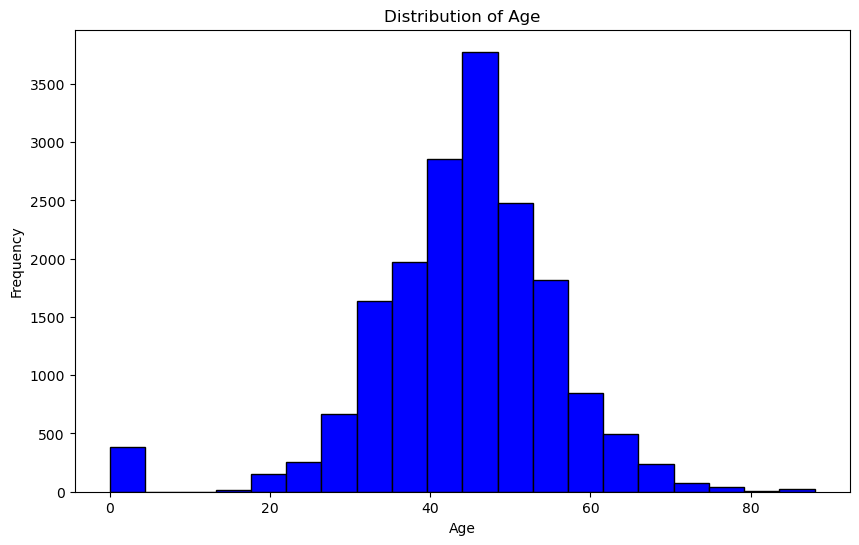

In [25]:
# Assuming you have already obtained the 'age_summary' from the previous step

# Assuming you have a DataFrame named 'metadata' and a column 'age'
# You can use the 'metadata["age"]' Series for the following code

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(metadata["age"], bins=20, color='blue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

Ages are not particularly skewed.

There are a number of patients whose values are 0, which probably indicates missing information.

In [26]:
## There appear to be 0.
len(metadata[metadata['age'] == 0])

388

Another lingering question is whether all of these are female, since a small percentage of cases include men as well.

In [27]:
## Unique Photometric Interpretation values:
metadata["Photometric Interpretation"].unique()

array(['MONOCHROME2', 'MONOCHROME1'], dtype=object)

Shows one of two values of "MONOCHROME."

According to this kaggle: "https://www.kaggle.com/code/paulbacher/eda-rsna-breast-cancer-detection"

"The value of Photometric Interpretation must be observed. There are 2 types:
In a MONOCHROME1 image, the pixel values represent the grayscale values of the image, with higher values corresponding to brighter pixels and lower values corresponding to darker pixels.
In a MONOCHROME2 image, the pixel values are **reversed**, with higher values corresponding to darker pixels and lower values corresponding to brighter pixels..."

The vast majority of the value counts are MONOCHROME2.

We want to swap all MONOCHROME2 images to MONOCHROME1 images.

In [28]:
value_counts = metadata["Photometric Interpretation"].value_counts().reset_index()
value_counts.columns = ['Photometric Interpretation', 'Count']

# Print the table
print(value_counts)

  Photometric Interpretation  Count
0                MONOCHROME2  16204
1                MONOCHROME1   3796


In [29]:
value_counts = metadata["Manufacturer"].value_counts().reset_index()
value_counts.columns = ['Manufacturer', 'Count']

# Print the table
print(value_counts)

        Manufacturer  Count
0            SIEMENS  15244
1            Planmed   3796
2         IMS s.r.l.    736
3  IMS GIOTTO S.p.A.    224


In [30]:
value_counts = metadata["Manufacturer's Model Name"].value_counts().reset_index()
value_counts.columns = ['Manufacturers Model Name', 'Count']

# Print the table
print(value_counts)

  Manufacturers Model Name  Count
0     Mammomat Inspiration  15244
1           Planmed Nuance   3796
2             GIOTTO CLASS    628
3         GIOTTO IMAGE 3DL    332
